# Advanced Topics

In [33]:
%precision 3

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets



### K-Nearest Neighbors (KNN)

<img src="./figures/irisDataCampKNN.jpeg" width=600>

In [34]:
iris = datasets.load_iris()
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(n_neighbors=6)

Task: Split the iris data into training and test. Predict on test

In [35]:
# Split into training and test set
X = iris['data']
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

1.0


Simple Idea, no modeling assumptions at all !!
Think about the following:

- What is "the model", i.e. what needs to be stored ? (coefficients, functions, ...)
- What is the model complexity ?
- Does this only work for classification ? What would be the regression analogy ?
- What improvements could we make to the simple idea ?
- In the modeling world:
    * linear ?
    * local vs. global
    * memory/CPU requirements
    * wide versus tall data ?


#### Handwritten Digits

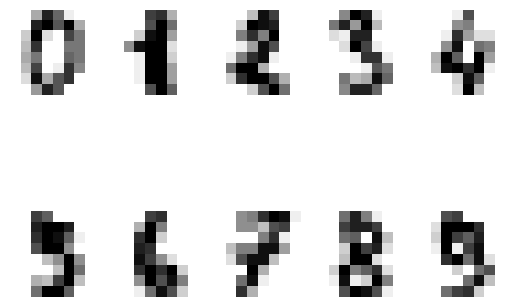

In [36]:
digits = datasets.load_digits()
import matplotlib.pyplot as plt

#how can I improve the plots ? (i..e no margins, box around plot...)
plt.figure(1)

for i in np.arange(10)+1:
    plt.subplot(2, 5, i)
    plt.axis('off')
    #plt.gray() 
    #plt.matshow(digits.images[i-1]) 
    plt.imshow(digits.images[i-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show() 


In [37]:
# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


In [38]:
# Big Confusion Matrix
preds = knn.predict(X_test)

pd.crosstab(preds,y_test)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,36,0,0,0,0,0,0,0,0,0
1,0,36,0,0,0,0,0,0,2,0
2,0,0,35,0,0,0,0,0,0,0
3,0,0,0,37,0,0,0,0,0,0
4,0,0,0,0,36,0,0,0,0,1
5,0,0,0,0,0,37,0,0,0,0
6,0,0,0,0,0,0,35,0,0,0
7,0,0,0,0,0,0,0,36,1,0
8,0,0,0,0,0,0,1,0,32,1


**Task**

Construct a model complexity curve for the digits dataset! In this exercise, you will compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, you will develop your intuition for overfitting and underfitting.

In [39]:
# # Setup arrays to store train and test accuracies
# neighbors = np.arange(1, 20)
# train_accuracy = np.empty(len(neighbors))
# test_accuracy = np.empty(len(neighbors))
# 
# # Loop over different values of k
# for i, k in enumerate(neighbors):
#     # Setup a k-NN Classifier with k neighbors: knn
#     knn = KNeighborsClassifier(___)
# 
#     # Fit the classifier to the training data
#     ___
#     
#     #Compute accuracy on the training set
#     train_accuracy[i] = ___
# 
#     #Compute accuracy on the testing set
#     test_accuracy[i] = ___
# 
# # Generate plot
# plt.title('k-NN: Varying Number of Neighbors')
# plt.plot(___, label = 'Testing Accuracy')
# plt.plot(___, label = 'Training Accuracy')
# plt.legend()
# plt.xlabel('Number of Neighbors')
# plt.ylabel('Accuracy')
# plt.show()

### Multinomial Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
iris = datasets.load_iris()

log_reg = LogisticRegression(multi_class='multinomial',solver='sag', max_iter=100, random_state=42)
log_reg.fit(iris["data"][:,3:],iris["target"])
    
preds = log_reg.predict_proba(iris["data"][:,3:])

preds[1:5,:]

array([[9.25859359e-01, 7.39618434e-02, 1.78797175e-04],
       [9.25859359e-01, 7.39618434e-02, 1.78797175e-04],
       [9.25859359e-01, 7.39618434e-02, 1.78797175e-04],
       [9.25859359e-01, 7.39618434e-02, 1.78797175e-04]])

**Task**: Compute a confusion matrix


**Further Reading and Explorations:**
* Read about "one versus all" pitted against multinomial. Check out this [notebook](plot_logistic_multinomial.ipynb).
* Read about [marginal probabilities](http://data.princeton.edu/wws509/stata/mlogit.html).

### ROC Curves

Simplest to go back to 2 labels from lesson 7:

In [41]:
iris = datasets.load_iris()
X = iris["data"][:,3:]
y = (iris["target"]==2).astype(int)
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

y_pred = log_reg.predict_proba(X_test) 
y_pred_prob = y_pred[:,1]

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred_prob > 0.25 ))

print(confusion_matrix(y_test, y_pred_prob > 0.5 ))

print(confusion_matrix(y_test, y_pred_prob > 0.75 ))

[[24  8]
 [ 0 13]]
[[32  0]
 [ 0 13]]
[[32  0]
 [ 4  9]]


**The need for more sophisticated metrics than accuracy and single thresholding**

This is particularly relevant for imbalanced classes, example: Emails

- Spam classification
    * 99% of emails are real; 1% of emails are spam
- Could build a classifier that predicts ALL emails as real
    * 99% accurate!
    * But horrible at actually classifying spam
    * Fails at its original purpose
<table> 
<tr>
    <td><img src="./figures/ISLR-Table4.7.png" width=600></td>
</tr>
</table>

 
 **Metrics from CM**
 
- Precision: $\frac{TP}{TP+FP}$
- Recall: $\frac{TP}{TP+FN}$
- F1 score: $2 \cdot \frac{precision \cdot recall}{precision + recall}$

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. ()
- High precision: Not many real emails predicted as spam
- High recall: Predicted most spam emails correctly
 

In [42]:
#Example:

In [43]:
print(classification_report(y_test, y_pred_prob > 0.5 ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



But we still need to fix a threshold for any of the metrics above to work !

Wouldn't it be best to communicate the prediction quality over a wide range (all!) of thresholds and enable the user to choose the most suitable one for his/her application !
That is the idea of the **Receiver Operating Characteristic (ROC)** curve!

<img src="./figures/DataCampROCexample.png" width=600>

In [44]:
#The pima-indians- diabetes data:
#  https://www.kaggle.com/uciml/pima-indians-diabetes-database#diabetes.csv

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("../data/diabetes.csv", header=None, names=col_names,skiprows=[0])
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [45]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [46]:
a = [1,2,3]
b = [*a]
b

[1, 2, 3]

In [47]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [48]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train,y_train)

y_pred = log_reg.predict_proba(X_test) 
y_pred_prob = y_pred[:,1]

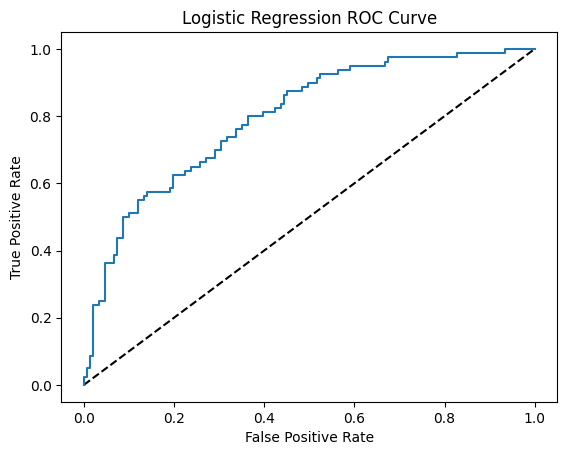

In [49]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show();

**Area under the ROC curve (AUC)**

In [50]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_prob)

0.797

**AUC using cross-validation**

In [51]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(log_reg, X, y, cv=10, scoring='roc_auc')

print(cv_scores)

[0.78888889 0.83037037 0.83777778 0.77333333 0.81111111 0.84814815
 0.81925926 0.92148148 0.85692308 0.83307692]


------------------------------------------------

### Regularized Regression

We will illustrate the concepts on the Boston housing data set

In [52]:
boston = pd.read_csv('../data/boston.csv')
#print(boston.head())
X = boston.drop('medv', axis=1).values
y = boston['medv'].values

**Variable Selection**

[ISLR slides on model selection](../figures/model_selection.pdf)

####  L2 Regression

Recall: Linear regression minimizes a loss function
- It chooses a coefficient for each feature variable
- Large coefficients can lead to overfitting
- Penalizing large coefficients: Regularization

**Detour: $L_p$ norms**

http://mathworld.wolfram.com/VectorNorm.html

Our new penalty term in finding the coefficients $\beta_j$ is the minimization

$$
\sum_{i=1}^n{\left( y_i - \beta_0 - \sum_{j=1}^p{\beta_j x_{ij}} \right)^2} + \lambda \sum_{j=1}^p{\beta_j^2} = RSS + \lambda \sum_{j=1}^p{\beta_j^2}
$$

Instead of obtaining **one** set of coefficients we have a dependency of $\beta_j$  on $\lambda$:

<img src="./figures/RidgeCoefficients1.jpg" width=600>

In [53]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)

ridge = Ridge(alpha=0.1)#, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)#?does this automatically take care of nromalization ??
#Returns the coefficient of determination R^2 of the prediction.
ridge.score(X_test, y_test)
ridge_pred[0:5]

array([28.59300181, 36.45275937, 15.30416262, 25.37120109, 18.91168087])

In [54]:
ridge2 = Ridge(alpha=0.1)#, normalize=False)
ridge2.fit(X_train, y_train)
ridge2_pred = ridge2.predict(X_test)
ridge2_pred[0:5]
ridge2.coef_

array([-1.32535034e-01,  3.59944827e-02,  4.38480378e-02,  3.09567615e+00,
       -1.40625952e+01,  4.06131940e+00, -1.20010626e-02, -1.36547356e+00,
        2.39463689e-01, -8.81732204e-03, -8.95518536e-01,  1.18278475e-02,
       -5.49776010e-01])

####  L1 Regression

Our penalty termy looks slightly different (with big consequences for **sparsity**)

$$
\sum_{i=1}^n{\left( y_i - \beta_0 - \sum_{j=1}^p{\beta_j x_{ij}} \right)^2} + \lambda \sum_{j=1}^p{| \beta_j |} = RSS + \lambda \sum_{j=1}^p{| \beta_j |}
$$

<img src="./figures/LassoCoefficients1.png" width=600>

(Comment: *LASSO* = "least absolute shrinkage and selection operator")

In [55]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)#, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
#Returns the coefficient of determination R^2 of the prediction.
lasso.score(X_test, y_test)
lasso.coef_

array([-1.22854422e-01,  3.86385849e-02, -4.97188385e-04,  1.48353759e+00,
       -0.00000000e+00,  3.89367421e+00, -1.96048179e-02, -1.10561397e+00,
        2.16673479e-01, -1.05844004e-02, -7.44014516e-01,  1.23959059e-02,
       -6.02281637e-01])

**Feature Selection Property of the LASSO**

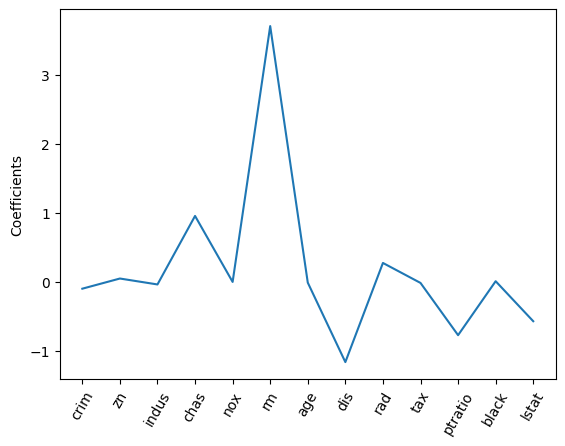

In [56]:
names = boston.drop('medv', axis=1).columns
lasso_coef = lasso.fit(X, y).coef_
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()

**Tuning the shrinkage parameter with CV**

(It seems that $\lambda$ is often referred to as $\alpha$)

From sklearn.linear_model:

* LassoCV
* RidgeCV
* GridSearchCV

In [57]:
from sklearn.linear_model import RidgeCV

reg = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1],store_cv_values = True)
reg.fit(X, y)
reg.score(X, y)

reg.cv_values_
#Open Questions: 
#1. how to extract all scores, possibly even the individual folds?
#2. What is the optimal alpha ??
#reg.cv_values_

array([[ 37.30292142,  37.34720525,  37.76559526,  40.43439122],
       [ 11.99700574,  11.97375126,  11.75676579,  10.50095584],
       [ 17.48829647,  17.4924878 ,  17.53207192,  17.7864549 ],
       ...,
       [ 14.6418552 ,  14.67645052,  15.00346175,  17.07274067],
       [ 17.86227108,  17.90234473,  18.28115447,  20.68282383],
       [113.70883594, 113.81266571, 114.7926396 , 120.99657642]])

In [58]:
from sklearn.linear_model import LassoCV

reg = LassoCV(cv=5, random_state=0).fit(X, y)
reg.score(X, y)

0.702

In [59]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]


lasso = Lasso(random_state=0,max_iter=2000)
#logarithmically spaced sequence
alphas = np.logspace(-4, -0.5, 20)

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

reg = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
reg.fit(X, y)

GridSearchCV(cv=5, estimator=Lasso(max_iter=2000, random_state=0),
             param_grid=[{'alpha': array([1.00000000e-04, 1.52830673e-04, 2.33572147e-04, 3.56969885e-04,
       5.45559478e-04, 8.33782223e-04, 1.27427499e-03, 1.94748304e-03,
       2.97635144e-03, 4.54877795e-03, 6.95192796e-03, 1.06246783e-02,
       1.62377674e-02, 2.48162892e-02, 3.79269019e-02, 5.79639395e-02,
       8.85866790e-02, 1.35387618e-01, 2.06913808e-01, 3.16227766e-01])}],
             refit=False)

(0.000, 0.316)

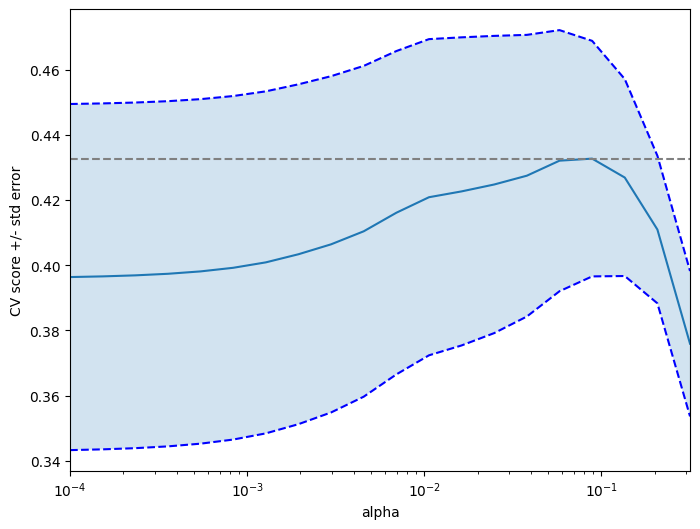

In [60]:
scores = reg.cv_results_['mean_test_score']
scores_std = reg.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

**How much can you trust the selection of alpha?**

Task: Find the opimal Alpha parameters (maximising the generalization score) on different subsets of the data

#### ElasticNet

**The mystery of the additional $\alpha$ paramater**

* The elastic net for correlated variables, which uses a penalty that is part L1, part L2.
* Compromise between the ridge regression penalty $(\alpha = 0)$ and the lasso penalty $(\alpha = 1)$. 
* This penalty is particularly useful in the $p >> N$ situation, or any situation where there are many correlated predictor variables.


$RSS + \lambda \sum_{j=1}^p{ \left( \frac{1}{2} (1-\alpha) \beta_j^2 + \alpha | \beta_j | \right)}$

The right hand side can be written as

$\sum_{j=1}^p{ \frac{1}{2} \lambda (1-\alpha) \beta_j^2 + \alpha \lambda | \beta_j |} = \sum_{j=1}^p{  \lambda_R \beta_j^2 +  \lambda_L | \beta_j |}$

with the Ridge penalty parameter $\lambda_R \equiv \frac{1}{2} \lambda (1-\alpha)$ and the lasso penalty parameter $\lambda_L \equiv \alpha \lambda$.

So we see that with

$\alpha = \frac{\lambda_L}{\lambda_L+ 2 \lambda_R}, \text{ and } \lambda= \lambda_L+ 2 \lambda_R$

Further Reading:
- this [notebook](plot_lasso_coordinate_descent_path.ipynb) shows how to plot the entire "path" of coefficients.

### Kaggle

####  [Housing Data](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

    

This [notebook](../data/kaggle/HousePrices/EDA.ipynb) (despite its annoying "humor") is a good start. 
(Get it [directly](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python) from kaggle)

####  Your first submission

<img src="./figures/kaggle_HousePrices1.jpg" width=600>

In [61]:
df_train = pd.read_csv('data/kaggle/HousePrices/train.csv')
df_test = pd.read_csv('data/kaggle/HousePrices/test.csv')

In [62]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [63]:
# Submission:
# pred_df = pd.DataFrame(y_pred, index=df_test.index, columns=["SalePrice"])
# pred_df.to_csv('../data/kaggle/HousePrices/submissions/en1.csv', header=True, index_label='Id')